In [44]:
import pandas as pd
import numpy as np

In [45]:
hpi = pd.DataFrame(pd.read_csv('hpi_final.csv'))
cpb = pd.DataFrame(pd.read_csv('cpb_final.csv'))
bps = pd.DataFrame(pd.read_csv('building_permits_final.csv'))
pop = pd.DataFrame(pd.read_csv('../../../../House_Value_Predict_Project3/data/Population_Change.csv'))
inc = pd.DataFrame(pd.read_csv('../../../../House_Value_Predict_Project3/data/county_income.csv'))
comp = pd.DataFrame(pd.read_csv('../../../../House_Value_Predict_Project3/data/complete_census.csv'))

hpi2 = pd.DataFrame(pd.read_csv('hpi_final2.csv'))

C:\Users\nilay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
hpi2 = hpi2.rename(columns = {
    'one_year': 'previous_one',
    'two_years': 'previous_two',
    'three_years': 'previous_three',
    'four_years': 'previous_four',
    'five_years': 'previous_five',
    'county': 'county_code'
})

cpb = cpb[['county_code','year','EMP','ESTAB','PAYANN']]
pop = pop[['Id2','pop_chg_yoy','year']]
pop = pop.rename(columns = {
    'Id2': 'county_code'
})

hpi = hpi[['county', 'year', 'hpi','one_year', 'two_years', 'three_years',
       'four_years', 'five_years'
          ]].rename(columns={'county': 'county_code'})

bps = bps[['date', 'county_code', 'single_units', 'total_units']].rename(columns={'date': 'year'})


In [39]:
inc = inc[['county_code','year','hh_income']]

In [40]:
df = pd.merge(hpi, cpb, how='inner', on=['county_code', 'year'])

df1 = pd.merge(df, bps, how='inner', on=['county_code', 'year'])

del df

df2 = pd.merge(df1, pop, how='inner', on = ['county_code', 'year'])

del df1

df3 = pd.merge(df2, inc.reset_index(), how="inner", on = ['county_code', 'year'])

del df2

df4 = pd.merge(df3, hpi2, how='inner', on=['county_code', 'year'])

del df3

df5 = pd.merge(df4, comp, how = 'inner', on=['county_code','year'])

del df4

del cpb
del bps
del pop
del inc
del comp

df5.head()

,county_code,year,hpi_x,one_year,two_years,three_years,four_years,five_years,EMP,ESTAB,...,ten19_units,tenure,three4_units,three_rooms,twenty49_units,two_rooms,two_units,under_18,units_total,vacant
0,10001,2010,162.912258,-0.066988,-0.093230,-0.094294,-0.079433,-0.055848,46405,3200,...,2690,57396,1144,12635,940,3992,752,39683,63563,6167
1,10001,2011,151.999032,-0.028126,-0.029266,-0.013338,0.011940,0.075964,48100,3177,...,2777,57629,1162,12421,985,4045,953,40050,64616,6987
2,10001,2012,147.723871,-0.001173,0.015216,0.041226,0.107103,0.113881,47883,3119,...,2997,57816,1202,12507,1102,4241,825,40375,65394,7578
3,10001,2013,147.550645,0.016408,0.042448,0.108403,0.115188,0.156970,48071,3166,...,2836,58524,1323,12781,1104,4009,836,40384,65924,7400
4,10001,2014,149.971613,0.025620,0.090510,0.097186,0.138293,NaN,49311,3263,...,3054,59142,1289,13164,1144,3627,773,40488,66652,7510


In [41]:
df5.to_csv('model_data.csv')

In [55]:
hpi_combined = pd.merge(hpi, hpi2, on=['county_code', 'year'], how='inner')

hpi_combined = hpi_combined[['one_year', 'two_years', 'three_years', 'four_years','five_years',
                            'previous_one', 'previous_two','previous_three','previous_four','previous_five']].dropna()

In [169]:
# bins = [0.0773-2*0.109,0.0773-0.109, 0.0773, 0.0773+0.109,0.0773+2*0.109, 0.0773+3*0.109]
# labels = [-2, -1, 0, 1, 2]

# df4['bin_three'] = pd.cut(df4['three_years'], bins=bins, labels = labels)


# bins = [0.137-2*0.155,0.137-0.155, 0.137, 0.137+0.155,0.137+2*0.155, 0.137+3*0.155]
# labels = [-2, -1, 0, 1, 2]

# df4['bin_five'] = pd.cut(df4['five_years'], bins=bins, labels = labels)

# bins = [0.0181-0.0594, 0.0181, 0.0181+0.0594, 0.0181+0.0594+0.01]
# labels = [-1, 0, 1]

# df4['bin_one'] = pd.cut(df4['one_year'], bins=bins, labels = labels)
# bins = [0.137459-2*0.154968,0.137459-0.154968,0.137459,0.137459+0.154968,0.137459+2*0.154968, np.inf]
# labels = [-2, -1, 0, 1, 2]

# df4['bin_five'] = pd.cut(df4['five_years'], bins=bins, labels = labels)

# df4.head()

In [8]:
df5.columns

Index(['county_code', 'year', 'hpi_x', 'one_year', 'two_years', 'three_years',
       'four_years', 'five_years', 'EMP', 'ESTAB', 'PAYANN', 'one_year_emp',
       'two_years_emp', 'three_years_emp', 'four_years_emp', 'five_years_emp',
       'one_year_estab', 'two_years_estab', 'three_years_estab',
       'four_years_estab', 'five_years_estab', 'one_year_pay', 'two_years_pay',
       'three_years_pay', 'four_years_pay', 'five_years_pay', 'single_units',
       'total_units', 'pop_chg_yoy', 'one_year_pop', 'two_years_pop',
       'three_years_pop', 'four_years_pop', 'five_years_pop', 'hh_income',
       'one_year_inc', 'two_years_inc', 'three_years_inc', 'four_years_inc',
       'five_years_inc', 'hpi_y', 'previous_one', 'previous_two',
       'previous_three', 'previous_four', 'previous_five', 'Unnamed: 0',
       'aggregate_rent', 'aggregate_rooms', 'bedrooms_total',
       'born_population', 'county', 'family_household', 'fiftyplus_units',
       'five9_units', 'fiveplus_rooms', 'for

In [12]:
df6 = df5[[
    'previous_one', 
    'previous_two',
    'previous_three',
    'previous_four',
    'previous_five',
    'pop_chg_yoy',
    'EMP',
    'ESTAB',
    'PAYANN',
    'one_year_emp',
    'two_years_emp',
    'three_years_emp',
    'four_years_emp',
    'five_years_emp',
    'one_year_estab',
    'two_years_estab',
    'three_years_estab',
    'four_years_estab',
    'five_years_estab',
    'one_year_pay',
    'two_years_pay',
    'three_years_pay',
    'four_years_pay',
    'five_years_pay',
    'single_units',
    'total_units',
    'one_year_pop',
    'two_years_pop',
    'three_years_pop',
    'four_years_pop', 
    'five_years_pop',
    'hh_income', 
    'one_year_inc',
    'two_years_inc',
    'three_years_inc',
    'four_years_inc',
    'five_years_inc',
    'aggregate_rent',
    'aggregate_rooms',
    'bedrooms_total',
    'born_population',
    'family_household',
    'fiftyplus_units',
    'five9_units',
    'fiveplus_rooms',
    'foreign_born',
    'four_rooms',
    'geographic_mobility',
    'household_type',
    'housing_units',
    'married_household', 
    'median_age', 
    'median_rent',
    'median_rooms',
    'median_year_built',
    'native_born',
    'naturalized',
    'nonfamily_household',
    'occupancy_status_total',
    'occupied', 
    'one_room',
    'owner_tenure',
    'population',
    'poverty_count',
    'renter_tenure',
    'single_attached',
    'single_detached', 
    'ten19_units',
    'tenure',
    'three4_units',
    'three_rooms',
    'twenty49_units',
    'two_rooms',
    'two_units',
    'under_18',
    'units_total',
    'vacant',
    'hpi_x',
    'one_year',
    'two_years',
    'three_years',
    'four_years',
    'five_years',
          ]]

In [13]:
df6 = df6.replace([np.inf, -np.inf], np.nan)
df6 = df6.dropna()

In [14]:
X = df6.drop(['one_year', 'two_years','three_years','four_years','five_years'], axis=1)
# y = df5[['one_year','two_years','three_years','four_years','five_years']]
y=df6[['one_year', 'two_years','three_years','four_years','five_years']]

print(X.shape, y.shape)

(4338, 78) (4338, 5)


In [15]:
# cov = np.cov(df5.values)
X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)
X_scaled

NameError: name 'StandardScaler' is not defined

In [57]:
hpi_combined['five_years'] = (1+hpi_combined['five_years']) **(1/5) -1
hpi_combined['four_years'] = (1+hpi_combined['four_years']) **(1/4)-1
hpi_combined['three_years'] = (1+hpi_combined['three_years']) **(1/3)-1
hpi_combined['two_years'] = (1+hpi_combined['two_years']) **(1/2)-1

hpi_combined['previous_five'] = (1+hpi_combined['previous_five']) **(1/5) -1
hpi_combined['previous_four'] = (1+hpi_combined['previous_four']) **(1/4)-1
hpi_combined['previous_three'] = (1+hpi_combined['previous_three']) **(1/3)-1 
hpi_combined['previous_two'] = (1+hpi_combined['previous_two']) **(1/2)-1


In [63]:
hpi2

,county_code,year,hpi,previous_one,previous_two,previous_three,previous_four,previous_five
0,10001,1986,100.000000,NaN,NaN,NaN,NaN,NaN
1,10001,1987,105.732500,0.057325,NaN,NaN,NaN,NaN
2,10001,1988,112.334000,0.062436,0.123340,NaN,NaN,NaN
3,10001,1989,119.446000,0.063311,0.129700,0.194460,NaN,NaN
4,10001,1990,121.723333,0.019066,0.083584,0.151239,0.217233,NaN
5,10001,1991,120.477500,-0.010235,0.008636,0.072494,0.139456,0.204775
6,10001,1992,112.649231,-0.064977,-0.074547,-0.056902,0.002806,0.065417
7,10001,1993,112.536250,-0.001003,-0.065915,-0.075475,-0.057848,0.001800
8,10001,1994,111.176875,-0.012079,-0.013070,-0.077198,-0.086643,-0.069229
9,10001,1995,112.756250,0.014206,0.001955,0.000950,-0.064089,-0.073668


In [58]:
hpi_combined

,one_year,two_years,three_years,four_years,five_years,previous_one,previous_two,previous_three,previous_four,previous_five
5,-0.064977,-0.033519,-0.026425,-0.016422,-0.011177,-0.010235,0.004309,0.023603,0.033176,0.037961
6,-0.001003,-0.006557,0.000317,0.002750,0.006541,-0.064977,-0.037995,-0.019339,0.000701,0.012754
7,-0.012079,0.000977,0.004004,0.008436,0.007261,-0.001003,-0.033519,-0.025819,-0.014787,0.000360
8,0.014206,0.012143,0.015369,0.012156,0.011108,-0.012079,-0.006557,-0.026425,-0.022402,-0.014246
9,0.010084,0.015952,0.011473,0.010335,0.013077,0.014206,0.000977,0.000317,-0.016422,-0.015188
10,0.021853,0.012168,0.010419,0.013827,0.012054,0.010084,0.012143,0.004004,0.002750,-0.011177
11,0.002575,0.004750,0.011165,0.009619,0.014580,0.021853,0.015952,0.015369,0.008436,0.006541
12,0.006930,0.015488,0.011979,0.017603,0.021398,0.002575,0.012168,0.011473,0.012156,0.007261
13,0.024119,0.014512,0.021186,0.025048,0.042759,0.006930,0.004750,0.010419,0.010335,0.011108
14,0.004995,0.019722,0.025357,0.047472,0.072756,0.024119,0.015488,0.011165,0.013827,0.013077


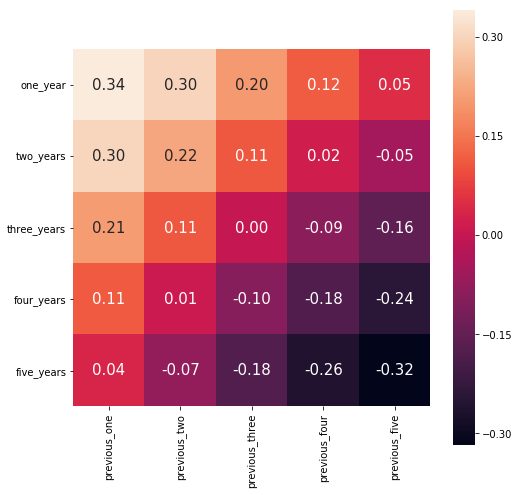

In [59]:
# Calculate and show correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns


cor = hpi_combined.corr()
%matplotlib inline
# cm = np.corrcoef(df5.values)
# sns.set(font_scale=1.5)
hm = sns.heatmap(cor[['previous_one', 'previous_two', 'previous_three','previous_four','previous_five']].loc[['one_year','two_years','three_years','four_years','five_years']],
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15})



fig = plt.gcf()
fig.set_size_inches( 8, 8)

# plt.savefig('corrmatrix.png')

plt.show()


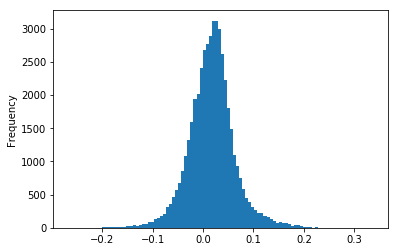

In [70]:
hpi_combined['previous_three'].plot(kind='hist', bins=100)

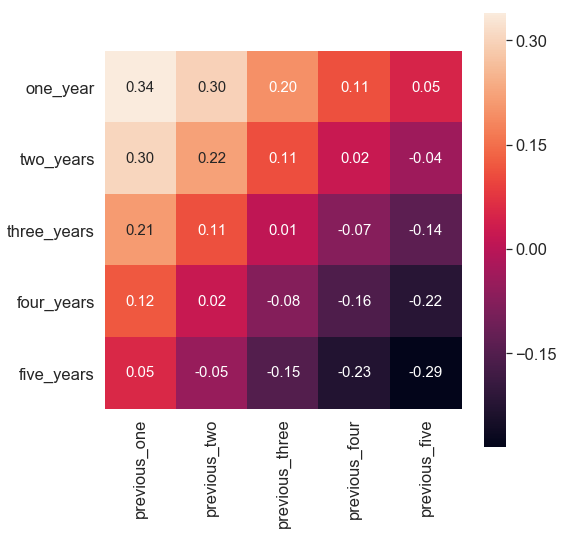

<Figure size 432x288 with 0 Axes>

In [234]:
# Calculate and show correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns


cor = hpi_combined.corr()
%matplotlib inline
# cm = np.corrcoef(df5.values)
# sns.set(font_scale=1.5)
hm = sns.heatmap(cor[['previous_one', 'previous_two', 'previous_three','previous_four','previous_five']].loc[['one_year','two_years','three_years','four_years','five_years']],
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15})



fig = plt.gcf()
fig.set_size_inches( 8, 8)

# plt.savefig('corrmatrix.png')

plt.show()

plt.savefig('five_year_corr.png')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)

X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state=42)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.4753637289985046, R2: 0.5470077126139631


In [166]:
from sklearn.metrics import  r2_score
r2 = r2_score(y_test, predictions)

print(r2)

0.3415386007121358


In [211]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, random_state=10)



# # Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# # Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [212]:
from keras.models import Sequential
from keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=36, activation='linear', input_dim=9))
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=1, activation='softmax'))

In [216]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=20
)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [218]:
model_loss, model_accuracy = model.evaluate(
    X_test, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 3.2167060681456556, Accuracy: 0.08865248227537477


In [127]:
encoded_predictions = model.predict_classes(X_test_scaled[:2944])
# prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [62]:
print(f"Predicted classes: {encoded_predictions}")
print(f"Actual Labels: {list(y_test[:100])}")

Predicted classes: [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Actual Labels: [0.1315026907685941, 0.2697173354417868, 0.11154402370020923, 0.2259231236300077, 0.0855401182790918, 0.17173895338629785, 0.20437108631090228, 0.6539165480248166, 0.034208027014668074, 0.2342800097890272, 0.4013201170201972, 0.1342903347822182, 0.14548489813583942, 0.4937756080062328, 0.20086554811725146, 0.034527993678817204, 0.05608221767587307, -0.013091122123621736, 0.11222030319752374, 0.11055443885856532, 0.2119297145036103, 0.2095133517935006, 0.2565673446482481, 0.010965444687221826, 0.19666538900337027, 0.1979866268597794, 0.034854514800839675, 0.04590726712978888, 0.10995888762617813, 0.10335471139615172, 0.12056986455189822, 0.22414790693919293, 0.07431873726561755, 0.2147724476200985, 0.14596949891067568, 0.21099912357581085, 0.24497627097632454, 0.3140924999891572, 0.05676587186925719, 0.011805804455868651, 0.03896958359696656, 0.10063706858595922, 0.2767162823013813, 0.26972410976242056, 0.259667391230

In [44]:
predictions = pd.DataFrame({
    'predictions': prediction_labels,
    'actual': y_test
})

NameError: name 'prediction_labels' is not defined

In [ ]:
predictions

In [ ]:
predictions['difference'] = predictions['actual'].values - predictions['predictions'].values

predictions

In [ ]:
predictions['difference'].loc[predictions['difference'] == 0].count()

In [ ]:
749/1168